In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.utils import resample,shuffle

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.feature_selection import chi2

In [2]:
data1 = pd.read_csv("dataset.csv")


In [3]:
# replacing PRCV value with 1 for example having PRCP value more than 0 
filt = data1["PRCP"]>0

data1.loc[filt,"PRCP"] = 1

In [4]:
(data1["PRCP"]>0).sum()

167

In [5]:
### checking percentage null values (column wise) 
data1.isnull().sum(axis = 0).sort_values(ascending = False)/len(data1)*100

TAVG       100.000000
WT02        97.865353
PGTM        96.606459
WT01        69.841270
WT08        52.873563
WDF5         0.985222
WSF5         0.985222
WDF2         0.273673
AWND         0.218938
WSF2         0.218938
STATION      0.000000
NAME         0.000000
DATE         0.000000
PRCP         0.000000
TMAX         0.000000
TMIN         0.000000
dtype: float64

### here 3 columns are having more than 95% entries missing so we're dropping these columns


<AxesSubplot:>

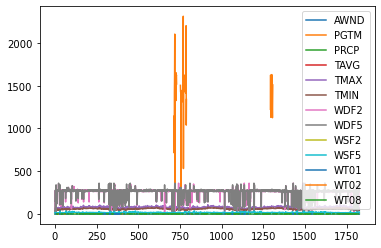

In [6]:
data1.plot()

In [7]:

d = (data1.isnull().sum(axis = 0).sort_values(ascending = False)/len(data1)*100 >95) ## series of T/F 

In [8]:
d.index[d.values] # masking over series over by its value(T/F) 

Index(['TAVG', 'WT02', 'PGTM'], dtype='object')

### 3 columns have been removed

In [9]:
data1.drop(columns = d.index[d.values],inplace = True)

In [10]:
### checking percentage null values column wise 
data1.isnull().sum(axis = 0).sort_values(ascending = False)/len(data1)*100

WT01       69.841270
WT08       52.873563
WDF5        0.985222
WSF5        0.985222
WDF2        0.273673
AWND        0.218938
WSF2        0.218938
STATION     0.000000
NAME        0.000000
DATE        0.000000
PRCP        0.000000
TMAX        0.000000
TMIN        0.000000
dtype: float64

In [11]:
data1

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",01-01-2016,2.46,0.0,64,43,10.0,30.0,8.1,11.0,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",02-01-2016,2.01,0.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",03-01-2016,0.67,0.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",04-01-2016,1.34,1.0,69,55,270.0,280.0,8.1,14.1,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",05-01-2016,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",27-12-2020,1.12,1.0,66,55,270.0,260.0,8.9,18.1,1.0,1.0
1823,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",28-12-2020,4.70,1.0,56,47,90.0,260.0,14.1,21.0,1.0,NaN
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",29-12-2020,1.57,0.0,65,42,340.0,360.0,10.1,18.1,NaN,NaN
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",30-12-2020,0.45,0.0,69,44,260.0,260.0,6.9,12.1,NaN,NaN


In [12]:
d1 = data1[data1["PRCP"]==1]
d0 = data1[data1["PRCP"]==0]

In [13]:
d1.shape #class 1 example(Eg. with output 1) 


(167, 13)

In [14]:
d0.shape #class 2 example(Eg. with output 0)

(1660, 13)

In [15]:
d1.isnull().sum().sort_values(ascending = False) #computing column wise empty cells

WT08       115
WT01        35
WDF5         2
WSF5         2
STATION      0
NAME         0
DATE         0
AWND         0
PRCP         0
TMAX         0
TMIN         0
WDF2         0
WSF2         0
dtype: int64

### now up sampling the class 1

In [16]:
d1_upsampled = resample(d1,random_state = 32,n_samples=len(d0),replace = True)


In [17]:
d1_upsampled.shape

(1660, 13)

In [18]:
d0.shape
d0

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",01-01-2016,2.46,0.0,64,43,10.0,30.0,8.1,11.0,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",02-01-2016,2.01,0.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",03-01-2016,0.67,0.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN
7,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",08-01-2016,2.24,0.0,62,44,280.0,340.0,8.1,16.1,NaN,NaN
8,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",09-01-2016,1.12,0.0,60,46,90.0,100.0,6.0,10.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",25-12-2020,1.57,0.0,75,52,270.0,270.0,8.9,14.1,NaN,NaN
1821,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",26-12-2020,0.67,0.0,69,46,260.0,250.0,6.9,12.1,NaN,NaN
1824,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",29-12-2020,1.57,0.0,65,42,340.0,360.0,10.1,18.1,NaN,NaN
1825,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",30-12-2020,0.45,0.0,69,44,260.0,260.0,6.9,12.1,NaN,NaN


In [19]:

data = d0.append(d1_upsampled,ignore_index=True)

In [20]:
data

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",01-01-2016,2.46,0.0,64,43,10.0,30.0,8.1,11.0,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",02-01-2016,2.01,0.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",03-01-2016,0.67,0.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",08-01-2016,2.24,0.0,62,44,280.0,340.0,8.1,16.1,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",09-01-2016,1.12,0.0,60,46,90.0,100.0,6.0,10.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",09-04-2020,5.82,1.0,57,52,80.0,90.0,10.1,15.0,NaN,NaN
3316,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",17-11-2017,1.34,1.0,73,61,270.0,280.0,10.1,16.1,NaN,NaN
3317,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",06-05-2017,3.58,1.0,66,52,270.0,270.0,10.1,19.9,NaN,1.0
3318,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",18-05-2019,2.68,1.0,72,56,270.0,280.0,8.9,17.0,NaN,NaN


### further cleaning of data 


In [21]:
data.isnull().sum().sort_values(ascending = False) # analyzing WT08 and WT01 

WT08       2007
WT01       1623
WDF5         30
WSF5         30
WDF2          5
AWND          4
WSF2          4
STATION       0
NAME          0
DATE          0
PRCP          0
TMAX          0
TMIN          0
dtype: int64

In [22]:
data.loc[:,["WT08","WT01"]].describe() # dropping column, as filling 1 at NaN position wouldn't help in prediction  

,WT08,WT01
count,1313.0,1697.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


In [23]:
data.drop(columns= ["WT08","WT01"],inplace = True)


In [24]:
 data.isnull().sum().sort_values(ascending = False) # analyzing WT08 and WT01 

WDF5       30
WSF5       30
WDF2        5
AWND        4
WSF2        4
STATION     0
NAME        0
DATE        0
PRCP        0
TMAX        0
TMIN        0
dtype: int64

In [25]:
data.loc[:,["WDF5",'WSF5']].mode()

,WDF5,WSF5
0,270.0,14.1


In [26]:
nan_WDF5 = (data["WDF5"].isnull()).index[(data["WDF5"].isnull()).values] #index of all NaN having celles in collumn WDF5
nan_WSF5 = (data["WSF5"].isnull()).index[(data["WSF5"].isnull()).values] #index of all NaN having celles in collumn WSF5

In [27]:
data.loc[nan_WDF5,"WDF5"] = [data.loc[:,"WDF5"].mode()] #replacing by mode
data.loc[nan_WSF5,"WSF5"] = [data.loc[:,"WSF5"].mode()] #replacing by mode

In [28]:
 data.isnull().sum().sort_values(ascending = False)

WDF2       5
AWND       4
WSF2       4
STATION    0
NAME       0
DATE       0
PRCP       0
TMAX       0
TMIN       0
WDF5       0
WSF5       0
dtype: int64

In [29]:
data.loc[:,["WDF2","AWND","WSF2"]].mode()

,WDF2,AWND,WSF2
0,270.0,1.12,8.9


In [30]:
nan_WDF2 = (data["WDF2"].isnull()).index[(data["WDF2"].isnull()).values]  ## filling mode value at missing cells
data.loc[nan_WDF2,"WDF2"] = [data.loc[:,"WDF2"].mode()]


nan_AWND = (data["AWND"].isnull()).index[(data["AWND"].isnull()).values]## filling mode value at missing cells
data.loc[nan_AWND,"AWND"] = [data.loc[:,"AWND"].mode()]


nan_WSF2 = (data["WSF2"].isnull()).index[(data["WSF2"].isnull()).values]## filling mode value at missing cells
data.loc[nan_WSF5,"WSF2"] = [data.loc[:,"WSF2"].mode()]

In [31]:
 data.isnull().sum().sort_values(ascending = False)

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       0
TMAX       0
TMIN       0
WDF2       0
WDF5       0
WSF2       0
WSF5       0
dtype: int64

#### Now our data is free of missing values

### feature selection for predictions by chi-square method (we will select the feature with high chi square value and low p value, that implies output depends on that feature more) 

In [32]:
y_train1 = data["PRCP"]
data.drop(columns= ["PRCP","STATION","NAME","DATE"],inplace = True)

#### above we have dropped STATION and NAME columns also as it is same for all data(p value = 0)

### label encodig data for chi-square implementation and for further ML implementation 

In [33]:
label_encoder = LabelEncoder()
#data["STATION"] = label_encoder.fit_transform(data["STATION"])
#data["NAME"] = label_encoder.fit_transform(data["NAME"])
#data["DATE"] = label_encoder.fit_transform(data["DATE"])

In [34]:
data

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,2.46,64,43,10.0,30.0,8.1,11.0
1,2.01,65,47,270.0,30.0,6.0,8.9
2,0.67,62,44,150.0,150.0,10.1,14.1
3,2.24,62,44,280.0,340.0,8.1,16.1
4,1.12,60,46,90.0,100.0,6.0,10.1
...,...,...,...,...,...,...,...
3315,5.82,57,52,80.0,90.0,10.1,15.0
3316,1.34,73,61,270.0,280.0,10.1,16.1
3317,3.58,66,52,270.0,270.0,10.1,19.9
3318,2.68,72,56,270.0,280.0,8.9,17.0


#### visual of data after laber encoding

In [35]:
chi_sq_val = chi2(data,y_train1)

In [36]:
chi_sq_val

(array([  397.32280701,  1876.83688503,   328.71642271, 13784.40873225,
        10930.59753004,   207.95195215,   527.31580615]),
 array([2.10732125e-088, 0.00000000e+000, 1.82959022e-073, 0.00000000e+000,
        0.00000000e+000, 3.84327974e-047, 1.08370861e-116]))

#### 2nd array shows p value

In [37]:
p_values = pd.Series(chi_sq_val[1],index = data.columns)
p_values.sort_values(ascending = False , inplace = True)

In [38]:
p_values

WSF2     3.843280e-47
TMIN     1.829590e-73
AWND     2.107321e-88
WSF5    1.083709e-116
TMAX     0.000000e+00
WDF2     0.000000e+00
WDF5     0.000000e+00
dtype: float64

<AxesSubplot:>

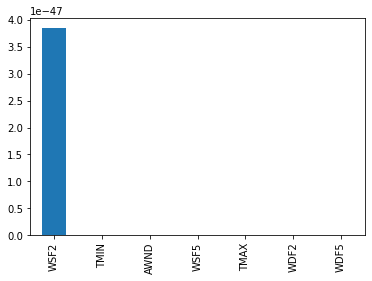

In [39]:
p_values.plot.bar()

#### now we are dropping WSF2 feature 

In [40]:
data.drop(columns= ["WSF2"],inplace = True)

## Training model on 7 features 

In [41]:
# data is input feature df (training)
# y_train is output(training)
#x_test,y_test 

In [42]:
data.loc[:,["TMAX","TMIN"]] = data.loc[:,["TMAX","TMIN"]].astype(float) 

In [43]:
#normalizing data between 0 and 1 by min max technique 
for x in data.columns:
    data[x] = (data[x]-data[x].min())/data[x].max()-data[x].min()


In [44]:
data["y"] = y_train1

In [45]:
ind = data.index
data


,AWND,TMAX,TMIN,WDF2,WDF5,WSF5,y
0,0.305590,-51.891892,-37.936709,-10.000000,-9.944444,-5.852941,0.0
1,0.249689,-51.882883,-37.886076,-9.277778,-9.944444,-5.914706,0.0
2,0.083230,-51.909910,-37.924051,-9.611111,-9.611111,-5.761765,0.0
3,0.278261,-51.909910,-37.924051,-9.250000,-9.083333,-5.702941,0.0
4,0.139130,-51.927928,-37.898734,-9.777778,-9.750000,-5.879412,0.0
...,...,...,...,...,...,...,...
3315,0.722981,-51.954955,-37.822785,-9.805556,-9.777778,-5.735294,1.0
3316,0.166460,-51.810811,-37.708861,-9.277778,-9.250000,-5.702941,1.0
3317,0.444720,-51.873874,-37.822785,-9.277778,-9.277778,-5.591176,1.0
3318,0.332919,-51.819820,-37.772152,-9.277778,-9.250000,-5.676471,1.0


In [46]:
data = shuffle(data)
data.index = ind
data

,AWND,TMAX,TMIN,WDF2,WDF5,WSF5,y
0,0.611180,-51.936937,-37.835443,-9.277778,-9.250000,-5.379412,1.0
1,0.361491,-51.882883,-37.822785,-9.638889,-9.638889,-5.500000,1.0
2,0.110559,-51.864865,-37.772152,-9.277778,-9.305556,-5.761765,1.0
3,0.305590,-51.765766,-37.658228,-9.250000,-9.250000,-5.676471,0.0
4,0.249689,-51.810811,-37.683544,-9.277778,-9.277778,-5.735294,0.0
...,...,...,...,...,...,...,...
3315,0.195031,-51.837838,-37.746835,-9.277778,-9.222222,-5.761765,0.0
3316,0.332919,-51.900901,-37.797468,-9.305556,-9.333333,-5.591176,1.0
3317,0.195031,-51.864865,-37.911392,-9.277778,-9.277778,-5.617647,1.0
3318,0.027329,-51.756757,-37.873418,-9.277778,-9.305556,-5.879412,0.0


In [47]:
x_test = data.tail(320)
x_train = data.drop(index = data.tail(320).index)

x_train.shape

(3000, 7)

In [48]:
y_train = x_train["y"]

In [49]:
x_train = x_train.drop(columns = "y")

In [50]:
y_test = x_test["y"]


In [51]:
x_test = x_test.drop(columns = "y")

In [52]:
y_test.shape

(320,)

## implementing model on neural network (MPL Classifier)

In [53]:
from sklearn.neural_network import MLPClassifier

In [54]:
clf = MLPClassifier(hidden_layer_sizes = (500,400,300,200,90),max_iter = 200, activation = "relu", solver = "adam", random_state = 1) # describing model

In [55]:
# fitting training data
clf.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(500, 400, 300, 200, 90), random_state=1)

In [56]:
y_pred = clf.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
c_m = confusion_matrix(y_pred,y_test)

In [59]:
c_m

array([[136,  53],
       [ 27, 104]], dtype=int64)